In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
all_AP_pt = np.load("all_AP_pt.npy")
all_AP_tf = np.load("all_AP_tf.npy")
all_mAP_pt = np.load("all_mAP_pt.npy")
all_mAP_tf = np.load("all_mAP_tf.npy")
all_mAR_pt = np.load("all_mAR_pt.npy")
all_mAR_tf = np.load("all_mAR_tf.npy")

In [6]:
all_AP_pt.shape, all_AP_tf.shape, all_mAP_pt.shape, all_mAP_tf.shape, all_mAR_pt.shape, all_mAR_tf.shape

((3, 10), (3, 10), (3,), (3,), (3,), (3,))

In [52]:
print("PyTorch")
for i, ep in zip(range(3), [3, 10, 20]):
  print(f"# of Trained Epochs: {ep} | ", f"Average Precision: \n", np.round_(all_AP_pt[i], decimals=2), "\n\n")

print("TensorFlow")
for i, ep in zip(range(3), [3, 10, 20]):
  print(f"# of Trained Epochs: {ep} | ", f"Average Precision: \n", np.round_(all_AP_tf[i], decimals=2), "\n\n")

PyTorch
# of Trained Epochs: 3 |  Average Precision: 
 [0.97 0.93 0.79 0.44 0.07 0.   0.   0.   0.   0.  ] 


# of Trained Epochs: 10 |  Average Precision: 
 [0.97 0.94 0.91 0.75 0.42 0.13 0.02 0.   0.   0.  ] 


# of Trained Epochs: 20 |  Average Precision: 
 [0.99 0.99 0.97 0.95 0.95 0.93 0.91 0.84 0.67 0.28] 


TensorFlow
# of Trained Epochs: 3 |  Average Precision: 
 [1.   0.99 0.99 0.98 0.97 0.96 0.94 0.89 0.74 0.27] 


# of Trained Epochs: 10 |  Average Precision: 
 [1.   1.   1.   1.   1.   0.99 0.99 0.98 0.95 0.89] 


# of Trained Epochs: 20 |  Average Precision: 
 [1.   1.   1.   1.   1.   1.   0.99 0.98 0.96 0.91] 




In [35]:
all_mAP_pt, all_mAP_tf

(array([0.31994994, 0.41359021, 0.84789653]),
 array([0.87299445, 0.97863287, 0.98401953]))

In [36]:
all_mAR_pt, all_mAR_tf

(array([0.37775, 0.4905 , 0.91175]), array([6.91375, 7.78375, 7.831  ]))

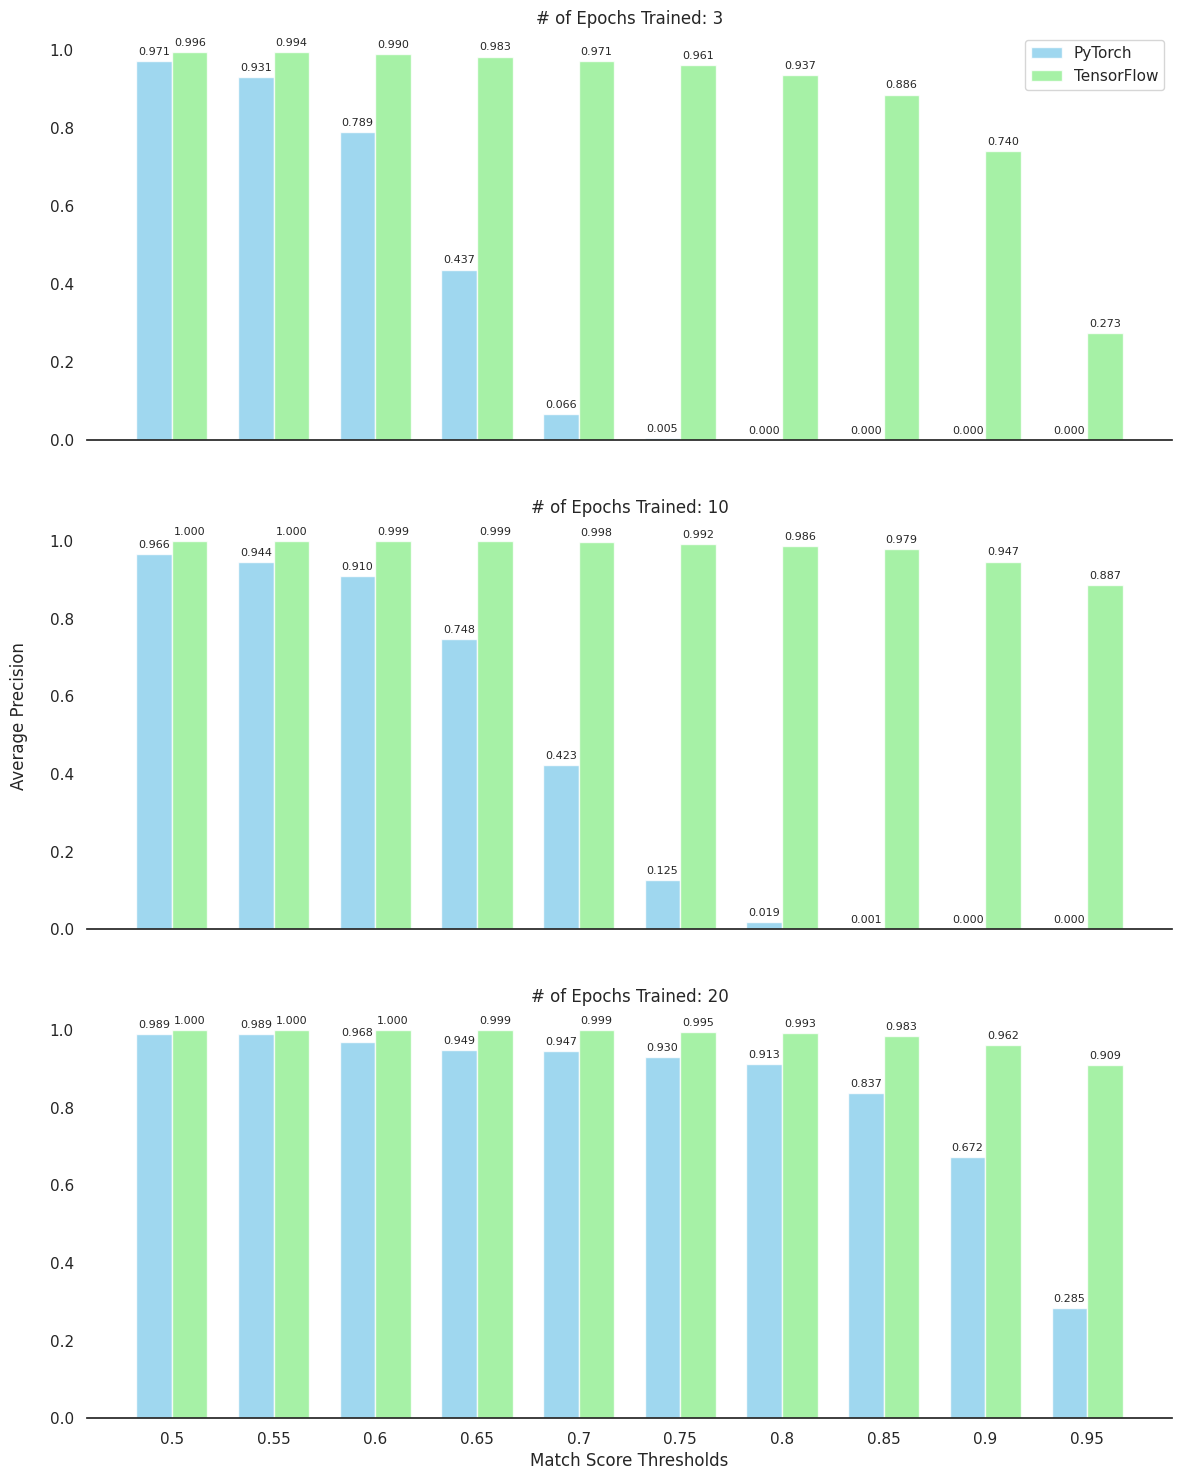

In [129]:
# Create a DataFrame with mean values
AP_df = pd.DataFrame({
    "pt": all_AP_pt.mean(0),
    "tf": all_AP_tf.mean(0),
})

# Set up the plot
sns.set(style="white")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=True)

# Plot for each row
for i, (ax, ep) in enumerate(zip(axes, [3, 10, 20])):
    bar_width = 0.35
    opacity = 0.8
    index = np.arange(10)
    xticklabels = np.round(np.linspace(0.5, 0.95, 10), decimals=2)

    bar1 = ax.bar(index, all_AP_pt[i], bar_width, alpha=opacity, color="skyblue", label="PyTorch")
    bar2 = ax.bar(index + bar_width, all_AP_tf[i], bar_width, alpha=opacity, color="lightgreen", label="TensorFlow")

    # Add labels to the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            text = ax.annotate(f"{height:.3f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                               xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")
            text.set_fontsize(8)

    ax.set_title(f"# of Epochs Trained: {ep}")

    # Remove the left spine
    sns.despine(ax=ax, left=True)

# Set the x-axis labels, title, and other settings for the last subplot
axes[-1].set_xlabel('Match Score Thresholds')
axes[-1].set_xticks(index + bar_width / 2)
axes[-1].set_xticklabels(xticklabels)

# Set the shared y-axis label
fig.text(0.07, 0.5, 'Average Precision', va='center', rotation='vertical')

# Add legends for each subplot
axes[0].legend()

# Show the plot
plt.show()


In [122]:
fig.savefig("AP_pt_tf.png")

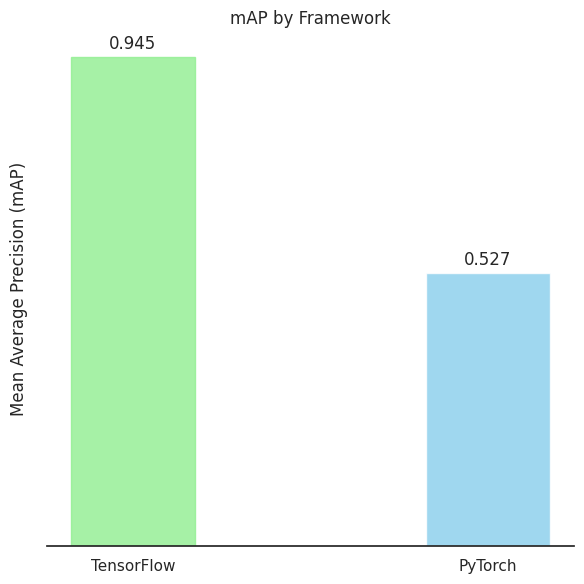

In [132]:
# Set up the plot
sns.set(style="white")
fig, ax = plt.subplots(figsize=(6, 6))

# Plot: mAP
bar_width = 0.35
opacity = 0.8
index = np.arange(2)

bar1 = ax.bar(index, [all_mAP_tf.mean(), all_mAP_pt.mean()], bar_width, alpha=opacity, color="skyblue")
bar1[0].set_color('lightgreen')  # Change color of the first bar

ax.set_title('mAP by Framework')
ax.set_ylabel('Mean Average Precision (mAP)')
ax.set_xticks(index)
ax.set_xticklabels(['TensorFlow', 'PyTorch'])
ax.set_yticklabels([])

# Add labels to the bars
for rect in bar1:
    height = rect.get_height()
    ax.annotate(f"{height:.3f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

# Remove the left spines
sns.despine(left=True)

# Show the plot
plt.tight_layout()
plt.show()


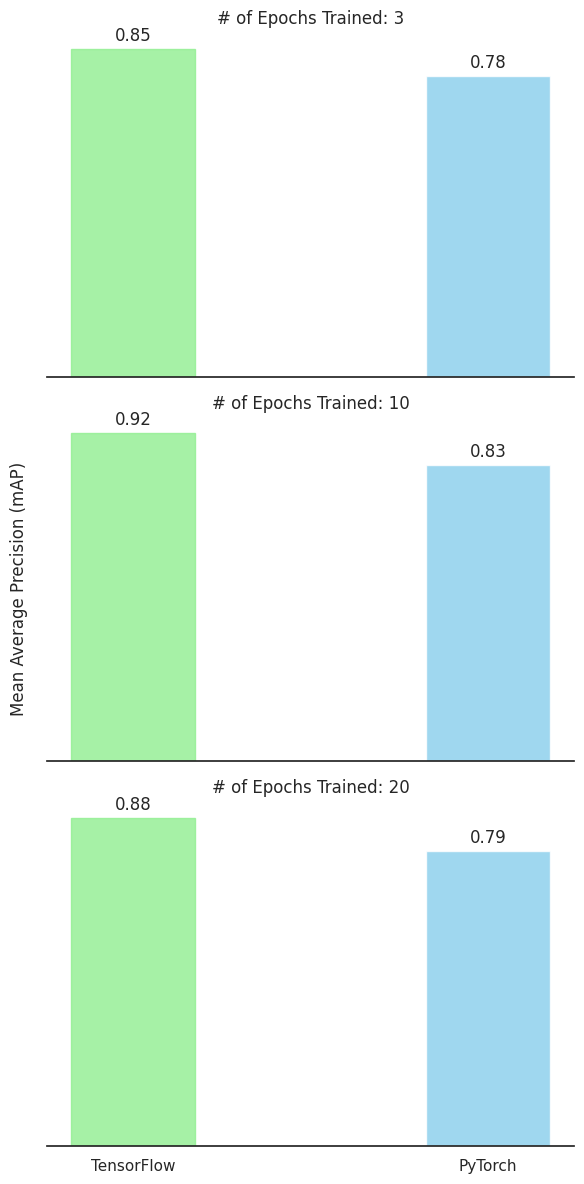

In [144]:
# Set up the plot
sns.set(style="white")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))

# Iterate over each value in all_mAP_tf and all_mAP_pt
for i, (mAP_tf, mAP_pt, ep) in enumerate(zip(all_mAP_tf, all_mAP_pt, [3, 10, 20])):
    # Plot: mAP
    ax = axes[i]
    bar_width = 0.35
    opacity = 0.8
    index = np.arange(2)

    bar1 = ax.bar(index, [mAP_tf, mAP_pt], bar_width, alpha=opacity, color="skyblue")
    bar1[0].set_color('lightgreen')  # Change color of the first bar

    ax.set_title(f'# of Epochs Trained: {ep}')
    ax.set_ylabel('Mean Average Precision (mAP)')
    ax.set_xticks(index)
    ax.set_yticklabels([])

    # Add labels to the bars
    for rect in bar1:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

    # Remove the left spines
    sns.despine(left=True, ax=ax)
    ax.set_xticklabels([]) if i != 2 else ax.set_xticklabels(['TensorFlow', 'PyTorch'])
    ax.set_ylabel("") if i != 1 else ax.set_ylabel("Mean Average Precision (mAP)")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [146]:
fig.savefig("mAP_pt_tf.png")